# Election Analysis

### This is an analysis project based on Data from the 2012 election. 
### We'll analyze 2 datasets, one with the results of political polls, and the other one with donations.

### For the first dataset we'll try to answer some questions like:

- Who was being polled and what was their party affiliatio?
- did the poll results favor Romney or Obama?
- how do undecided voters affect the poll?
- can we account for the undecided voters?
- how did voter sentiment change over time?
- can we see an effect in the pollsfrom the debates?

In [29]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import requests
from io import StringIO
from datetime import datetime

In [2]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [3]:
source = requests.get(url).text

poll_data = StringIO(source)

In [4]:
poll_df = pd.read_csv(poll_data)

In [5]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.0+ KB


In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [7]:
poll_df.drop(columns=['Other', 'Question Text', 'Question Iteration'], axis=1, inplace=True)

In [18]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 14 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
dtypes: float64(4), object(10)
memory usage: 64.2+ KB


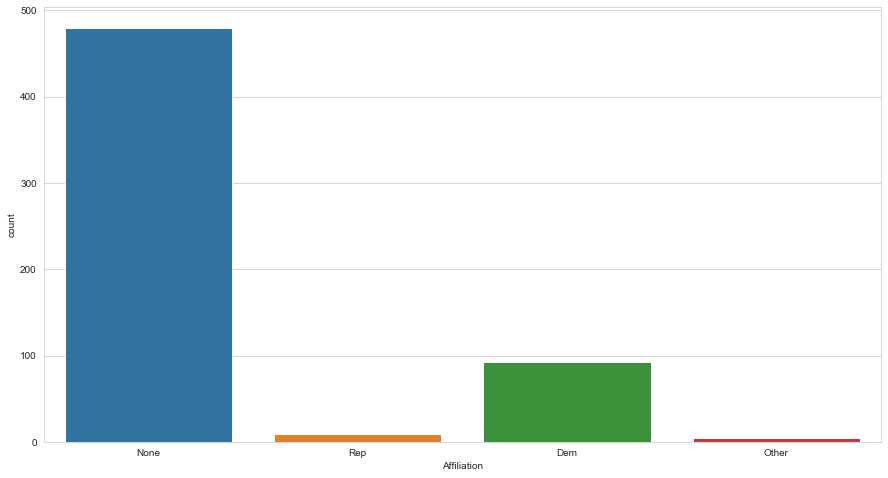

In [8]:
sns.countplot('Affiliation', data=poll_df)
plt.gcf().set_size_inches(15, 8)

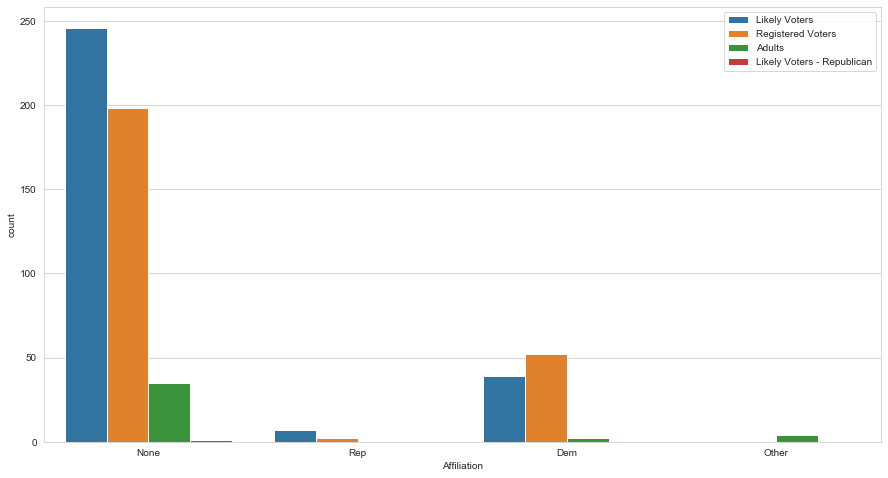

In [9]:
sns.countplot('Affiliation', data=poll_df, hue='Population')
plt.gcf().set_size_inches(15, 8)
plt.legend(loc = 'upper right')

In [10]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


In [11]:
# Let's take a look at the averages for Romney, Obama and the ones undecided

In [12]:
avg = pd.DataFrame(poll_df.mean())
avg.head()

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [13]:
avg.drop('Number of Observations', axis=0, inplace=True)
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [14]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)

In [15]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


In [16]:
# Now let's plot the averages and make the y error equals to the standard deviation we got

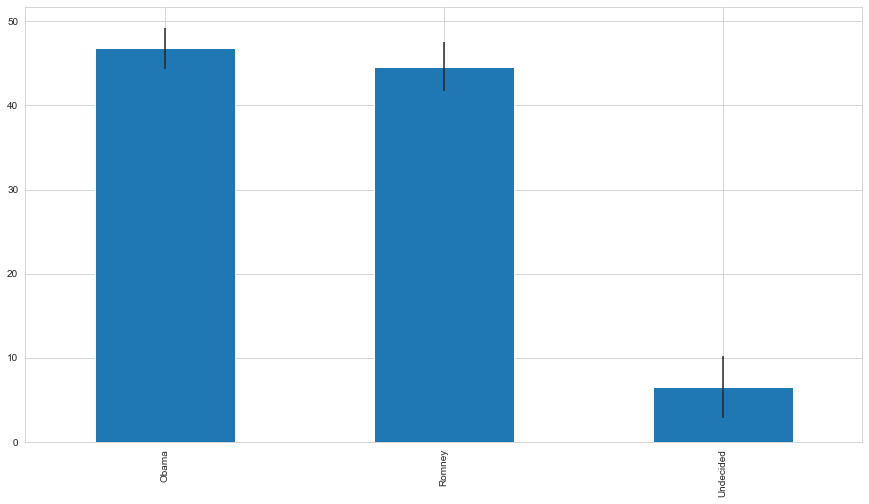

In [17]:
avg.plot(yerr=std, kind='bar', legend=False)
plt.gcf().set_size_inches(15, 8)

In [19]:
# As we can see the polls are really close, even considering the undecided factor. Let's take a look at those numbers

In [21]:
poll_avg = pd.concat([avg,std], axis=1)
poll_avg.columns = ['Average', 'STD']
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [22]:
# It looks like Obama and Romney are really close, but what about the undecided? 

In [23]:
# Let's do a quick time series analysis of voter sentiment by plotting Obama, Romney favor versus the pool end dates.

In [24]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


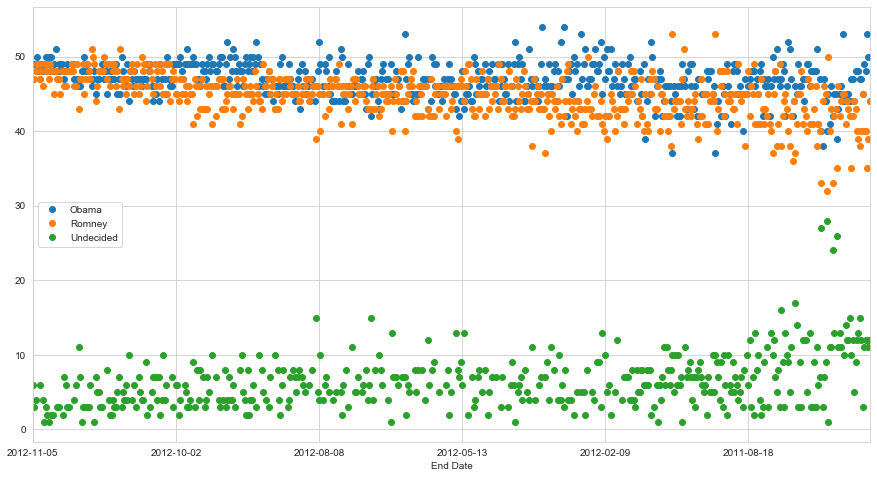

In [27]:
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided' ], linestyle='', marker='o')
plt.gcf().set_size_inches(15, 8)

In [28]:
# The above plot is just to have a general idea of how sentiment goes over time.
# Now, what we're gonna do is to plot out the difference between Obama and Romney and see how that changes as time moves along.

In [30]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney) / 100

In [31]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [32]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.09


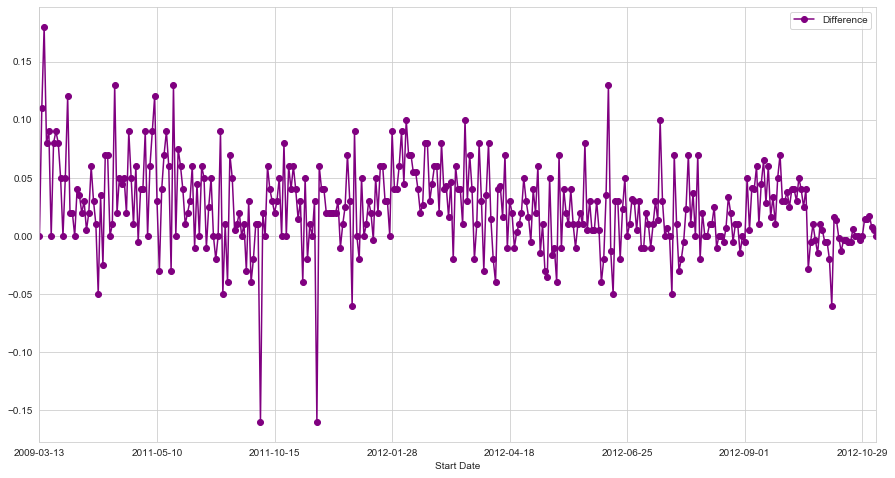

In [34]:
poll_df.plot('Start Date', 'Difference', marker='o', linestyle='-', color='purple')
plt.gcf().set_size_inches(15,8)

In [36]:
# There are 2 particular points in October that are unusual.
# We know that the debates took place in October, so let's zoom in and see that specific month.

In [37]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
print(min(xlimit))
print(max(xlimit))

325
352


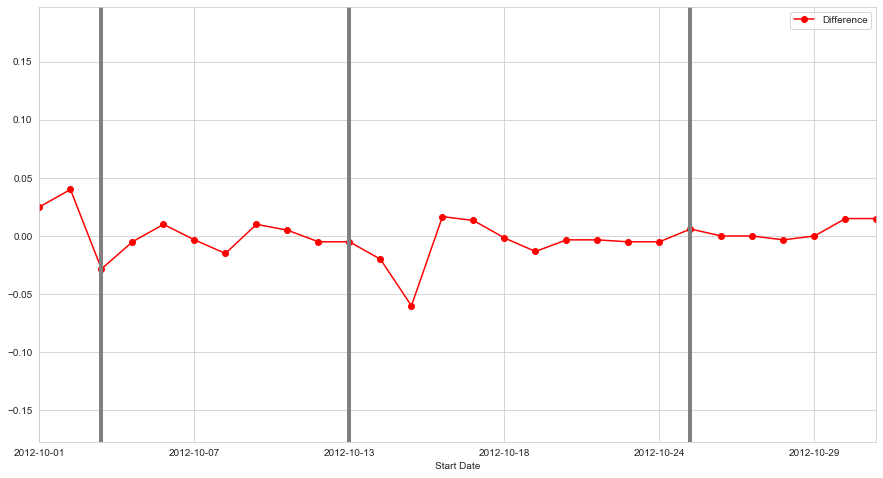

In [40]:
poll_df.plot('Start Date', 'Difference', marker='o', linestyle='-', color='red', xlim=(325,352))
plt.gcf().set_size_inches(15,8)

# Oct 3rd
plt.axvline(x=325+2, linewidth=4, color='grey')
# Oct 11th
plt.axvline(x=325+10, linewidth=4, color='grey')
# Oct 22nd
plt.axvline(x=325+21, linewidth=4, color='grey')

In [41]:
# Now we have the October month only, and markers on every debate point.
# It seems, based on the plot, that after the first debate that happened on October 3rd, the sentiment for Obama increased.
# After the second debate the sentiment for Romney became more favorable.
# After the third debate everyone was pretty even.

## Now let's see the Donor's dataset

In [42]:
# The dataset can be found on this link:

url = 'https://www.dropbox.com/s/l29oppon2veaq4n/Election_Donor_Data.csv?dl=0'

### Some of the questions we could answer are:

- how much was donated and what was the average donation?
- how did the donations differ between candidates?
- how did the donations differ between Democrats and Republicans?
- what were the demographics of the donors?
- is there a pattern to donation amounts?

In [44]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [46]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [47]:
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [48]:
# Let's take a look at the average and standar deviation

In [49]:
don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()

print('The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 298.24 with a std of 3749.67


In [50]:
# This is a huge standard deviation. Let's investigate that

In [53]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values(ascending=True, inplace=True)

top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [56]:
# we have two issues here: negative refund amounts and very large donations. That's what is causing our big standard deviation.
# Let's get rid of the negative refund amounts so that our distribution can make sense.

In [57]:
top_donor = top_donor[top_donor > 0]
top_donor.sort_values(ascending=True, inplace=True)

In [58]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [59]:
# These are the most common amounts

In [60]:
# Now, let's do a histogram to visualize it, but we will limit it to 2,500 since that was the biggest donation in the top 10.

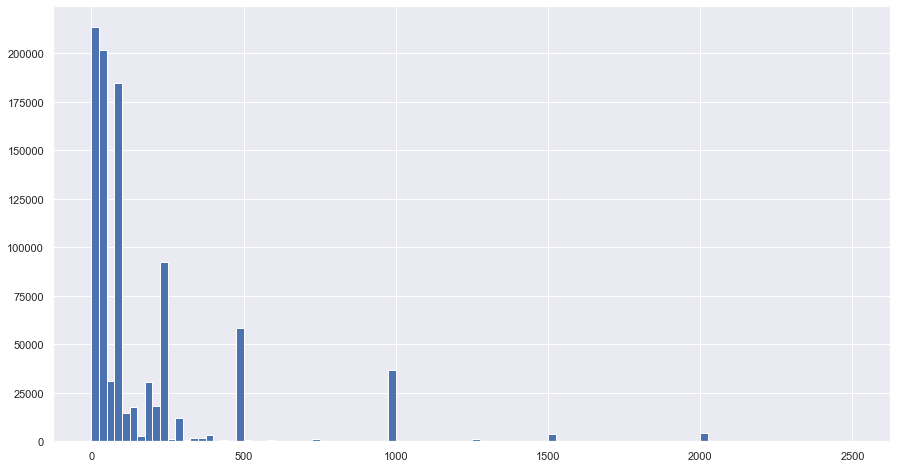

In [63]:
com_don = top_donor[top_donor < 2500]
sns.set()
com_don.hist(bins=100)
plt.gcf().set_size_inches(15,8)

In [65]:
# It seems people are inclined to donate rounded number values

In [66]:
# We'll dive deeper and try to separate donations by party.

In [68]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [69]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [70]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [71]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [72]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [73]:
# As we can see, Obama had the highest number of donations. Now let's take a look at those values in dollars

In [74]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [77]:
# The way it's presented is a little bit hard to read. Let's make it more readable

In [75]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i=0

for don in cand_amount:
    print('The candidate %s raise %.0f dollars' %(cand_amount.index[i], don))
    print('\n')
    i += 1

The candidate Bachmann, Michelle raise 2711439 dollars


The candidate Cain, Herman raise 7101082 dollars


The candidate Gingrich, Newt raise 12832770 dollars


The candidate Huntsman, Jon raise 3330373 dollars


The candidate Johnson, Gary Earl raise 566962 dollars


The candidate McCotter, Thaddeus G raise 39030 dollars


The candidate Obama, Barack raise 135877427 dollars


The candidate Paul, Ron raise 21009620 dollars


The candidate Pawlenty, Timothy raise 6004819 dollars


The candidate Perry, Rick raise 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars


The candidate Romney, Mitt raise 88335908 dollars


The candidate Santorum, Rick raise 11043159 dollars




In [76]:
# Now it's better to read but kinda hard to compare. Let's put it into a graph

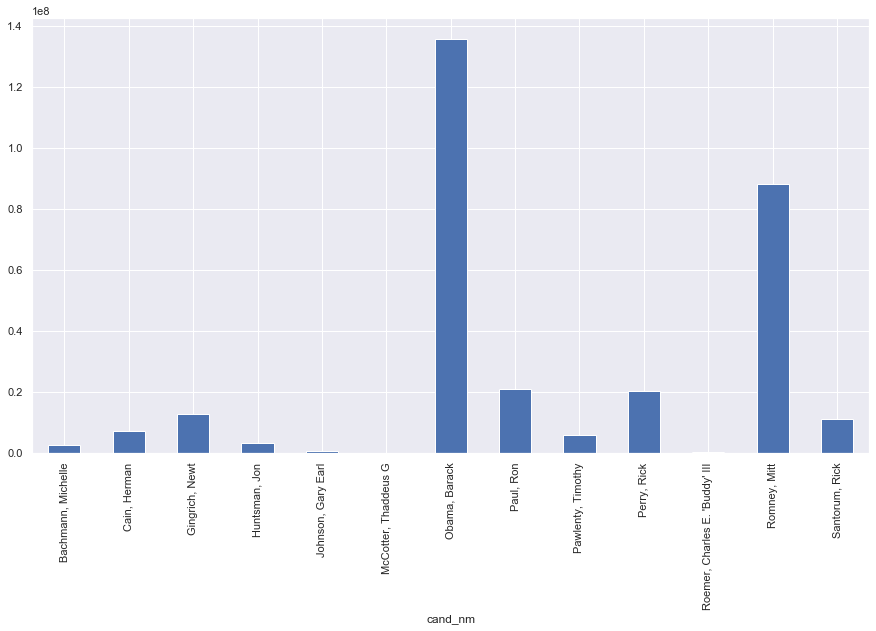

In [79]:
cand_amount.plot(kind='bar')
plt.gcf().set_size_inches(15,8)

In [80]:
# Since Obama is the only Democrat, let's compare it with all the other Republicans 

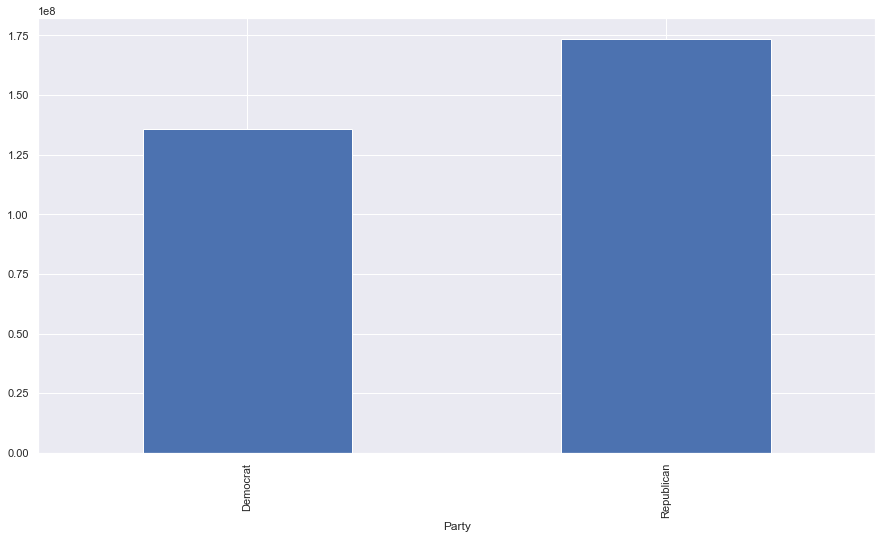

In [81]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')
plt.gcf().set_size_inches(15,8)

In [82]:
# Looks like Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding 
# being splintered across multiple candidates.

In [83]:
# Let's look at donations and who they came from (as far as occupation is concerned)

In [85]:
occupation_df = donor_df.pivot_table('contb_receipt_amt', index = 'contbr_occupation',
                                    columns = 'Party', aggfunc = 'sum')

In [86]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [87]:
occupation_df.tail()

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


In [88]:
occupation_df.shape

(45067, 2)

In [89]:
# Let's see what occupations, as a group, contributed more than a million dollars total.

In [90]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [91]:
occupation_df.shape

(31, 2)

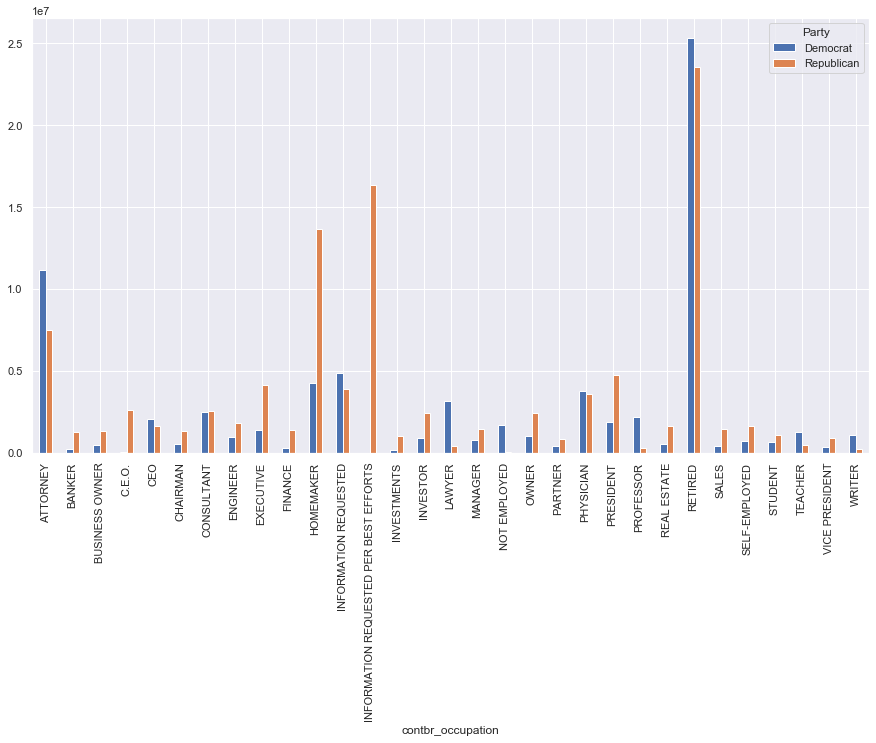

In [93]:
occupation_df.plot(kind='bar')
plt.gcf().set_size_inches(15,8)

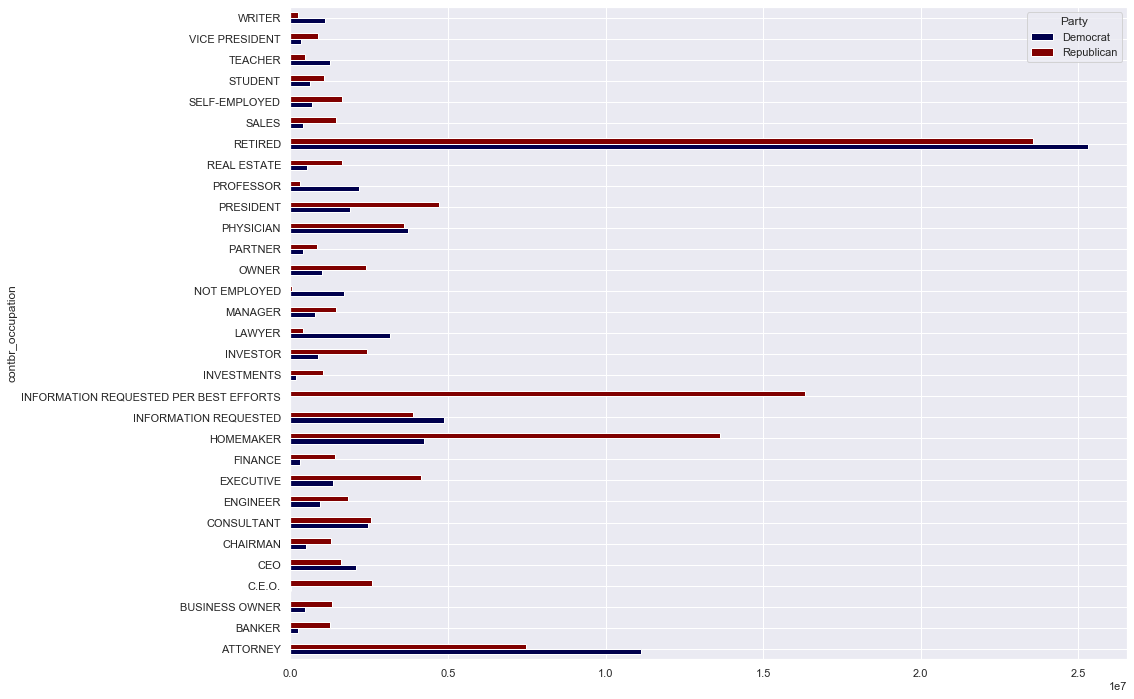

In [96]:
occupation_df.plot(kind='barh', cmap='seismic')
plt.gcf().set_size_inches(15,12)

In [98]:
# We have a few issues on this graph. We have 'Information requested per best efforts' and 'Information requested'
# which are not actually an occupation, and we have 2 CEO occupations, which are actually the same thing.

In [99]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

occupation_df.drop('C.E.O.', inplace=True)

KeyError: 'C.E.O.'

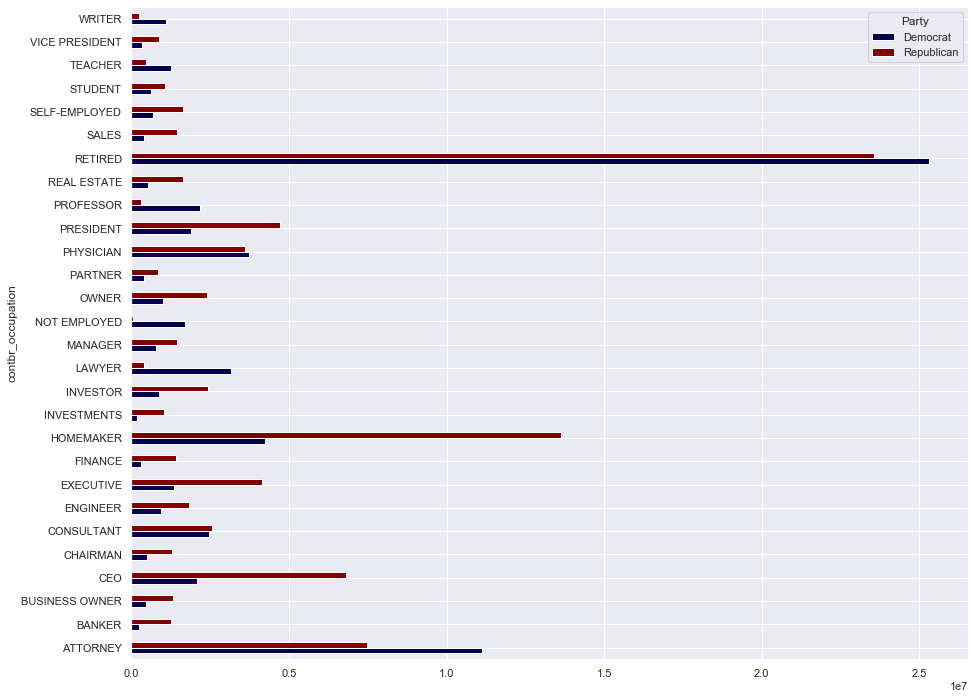

In [102]:
occupation_df.plot(kind='barh', cmap='seismic')
plt.gcf().set_size_inches(15,12)